In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors

In [2]:
f = uproot.open("/Users/isaac/Downloads/muonGun_reco_10.root")

In [3]:
# Get the list of branches in the tree
for branch in f["events"].keys():
    print(branch)

TightSelectedPandoraPFOs#0
TightSelectedPandoraPFOs#0/TightSelectedPandoraPFOs#0.index
TightSelectedPandoraPFOs#0/TightSelectedPandoraPFOs#0.collectionID
SiTracks#0
SiTracks#0/SiTracks#0.index
SiTracks#0/SiTracks#0.collectionID
SelectedPandoraPFOs#0
SelectedPandoraPFOs#0/SelectedPandoraPFOs#0.index
SelectedPandoraPFOs#0/SelectedPandoraPFOs#0.collectionID
LooseSelectedPandoraPFOs#0
LooseSelectedPandoraPFOs#0/LooseSelectedPandoraPFOs#0.index
LooseSelectedPandoraPFOs#0/LooseSelectedPandoraPFOs#0.collectionID
LE_SelectedPandoraPFOs#0
LE_SelectedPandoraPFOs#0/LE_SelectedPandoraPFOs#0.index
LE_SelectedPandoraPFOs#0/LE_SelectedPandoraPFOs#0.collectionID
LE_LooseSelectedPandoraPFOs#0
LE_LooseSelectedPandoraPFOs#0/LE_LooseSelectedPandoraPFOs#0.index
LE_LooseSelectedPandoraPFOs#0/LE_LooseSelectedPandoraPFOs#0.collectionID
MCPhysicsParticles#0
MCPhysicsParticles#0/MCPhysicsParticles#0.index
MCPhysicsParticles#0/MCPhysicsParticles#0.collectionID
YokeEndcapCollection
YokeEndcapCollection/YokeEndcap

In [5]:
tree = uproot.concatenate("/Users/isaac/Downloads/muonGun_reco_*.root:events",filter_name=["AllTracks*"])

In [7]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [8]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [58]:
allHits=ak.zip({
    "type" : tree["AllTracks.type"],
    "chi2" : tree["AllTracks.chi2"],
    "ndf" : tree["AllTracks.ndf"],
    "dedx" : tree["AllTracks.dEdx"],
    "dedxError" : tree["AllTracks.dEdxError"],
    "innerRad" : tree["AllTracks.radiusOfInnermostHit"],
    "sdb" : tree["AllTracks.subDetectorHitNumbers_begin"],
    "sde" : tree["AllTracks.subDetectorHitNumbers_end"],
    "tsb" : tree["AllTracks.trackStates_begin"],
    "tse" : tree["AllTracks.trackStates_end"],
    "dxdqB" : tree["AllTracks.dxQuantities_begin"],
    "dxdqE" : tree["AllTracks.dxQuantities_end"],
    "thb" : tree["AllTracks.trackerHits_begin"],
    "the" : tree["AllTracks.trackerHits_end"],
    "tb" : tree["AllTracks.tracks_begin"],
    "te" : tree["AllTracks.tracks_end"],
    "CID0" : tree["AllTracks#0.collectionID"],
    "CID1" : tree["AllTracks#1.collectionID"]
}, depth_limit=1)

In [47]:
atFirstHit= tree["AllTracks_1.location"] == 2
allHitsB=ak.zip({
    "d0" : tree["AllTracks_1.D0"][atFirstHit],
    "phi" : tree["AllTracks_1.phi"][atFirstHit],
    "omega" : tree["AllTracks_1.omega"][atFirstHit],
    "z0" : tree["AllTracks_1.Z0"][atFirstHit],
    "tanLam" : tree["AllTracks_1.tanLambda"][atFirstHit],
    "time" : tree["AllTracks_1.time"][atFirstHit],
    "x" : tree["AllTracks_1.referencePoint.x"][atFirstHit],
    "y" : tree["AllTracks_1.referencePoint.y"][atFirstHit],
    "z" : tree["AllTracks_1.referencePoint.z"][atFirstHit],
    "cov" : tree["AllTracks_1.covMatrix[21]"][atFirstHit]
}, depth_limit=1)

In [17]:
print(allHits.type)

40 * var * {type: int32, chi2: float32, ndf: int32, dedx: float32, dedxError: float32, innerRad: float32, sdb: uint32, sde: uint32, tsb: uint32, tse: uint32, dxdqB: uint32, dxdqE: uint32, thb: uint32, the: uint32, tb: uint32, te: uint32}


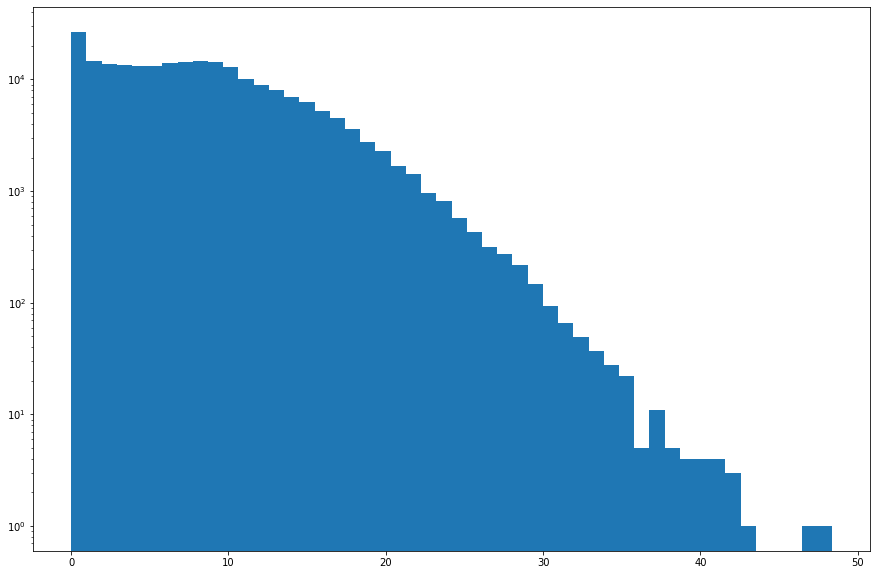

In [22]:
plot1DHistogram(allHits.chi2, bins=50, scale="log")

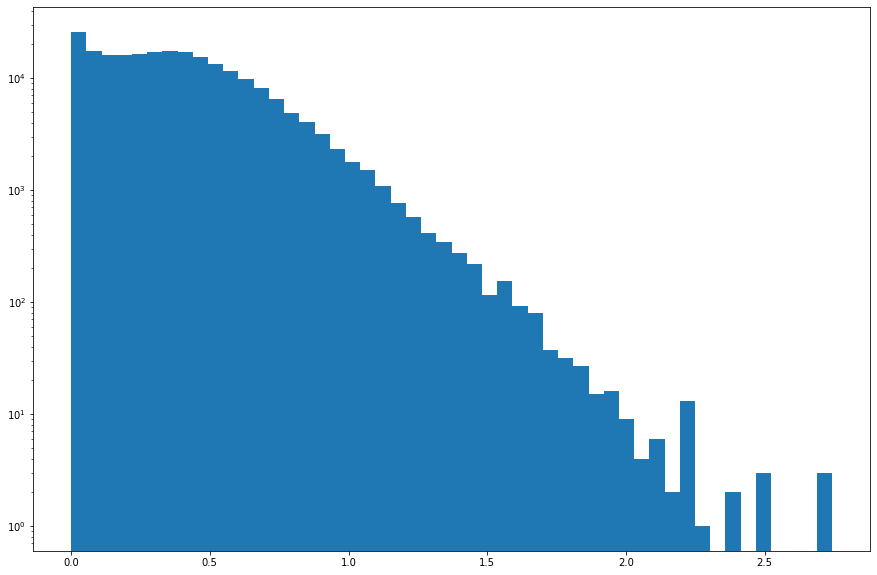

In [24]:
plot1DHistogram(allHits.chi2/allHits.ndf, bins=50, scale="log")

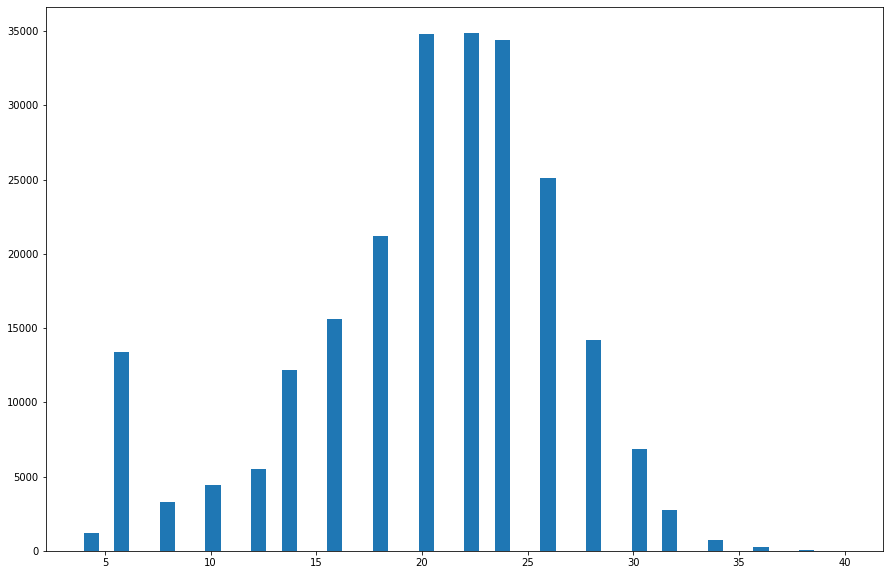

In [27]:
plot1DHistogram(allHits.ndf, bins=50)

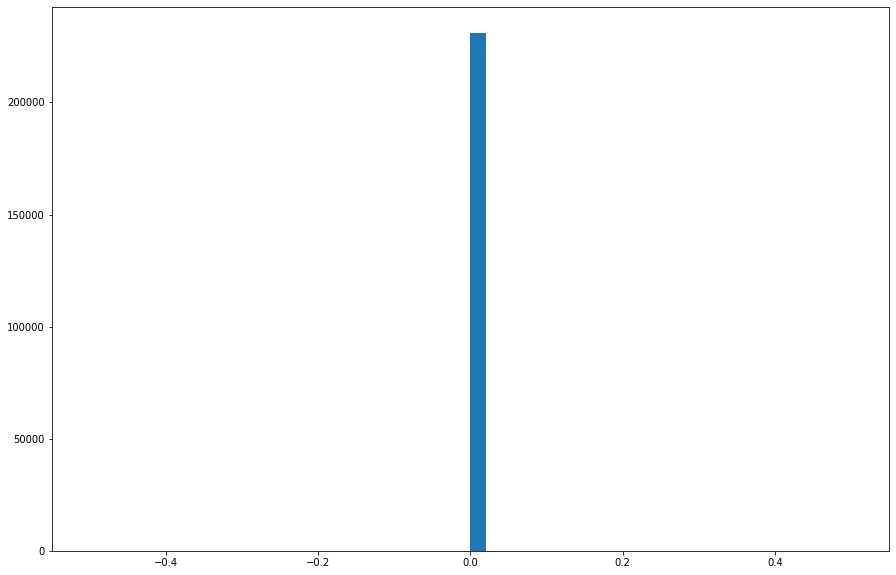

In [28]:
plot1DHistogram(allHits.dedx, bins=50)

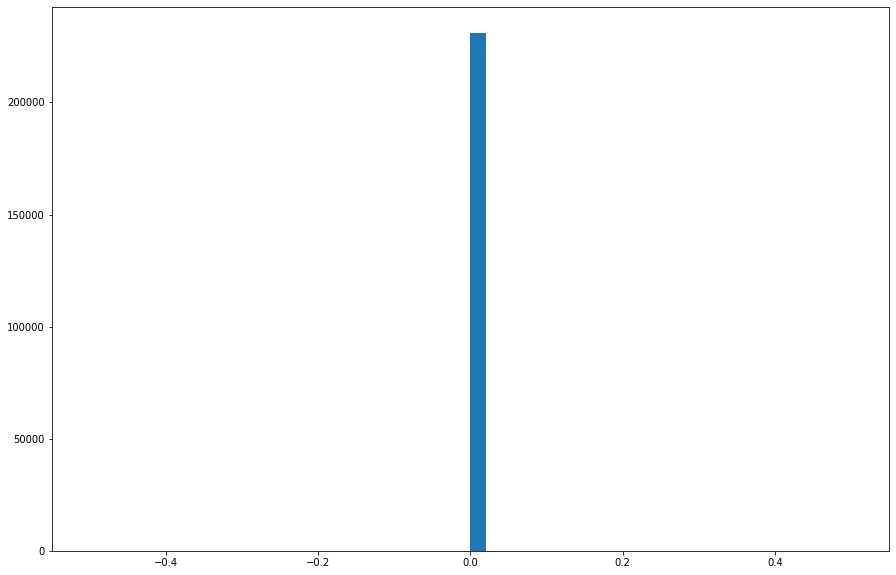

In [30]:
plot1DHistogram(allHits.dedxError, bins=50)

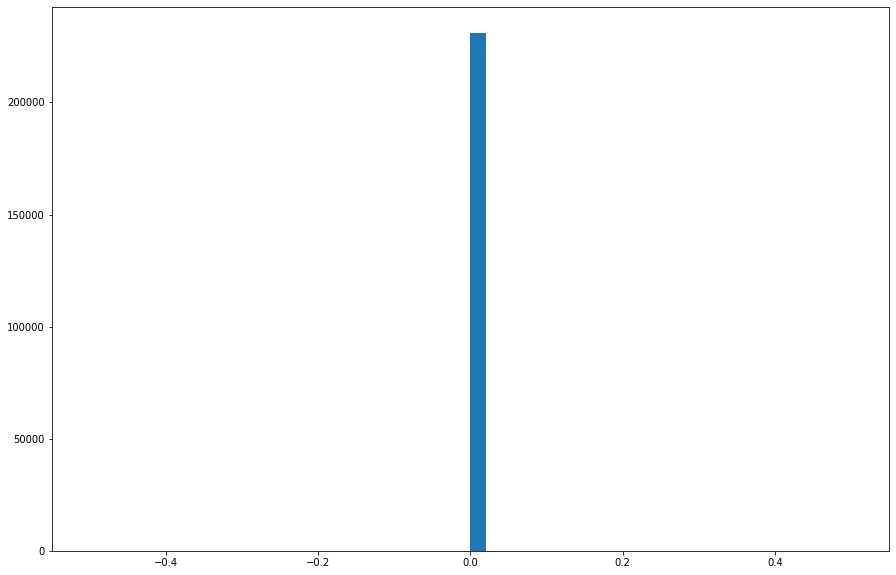

In [31]:
plot1DHistogram(allHits.innerRad, bins=50)

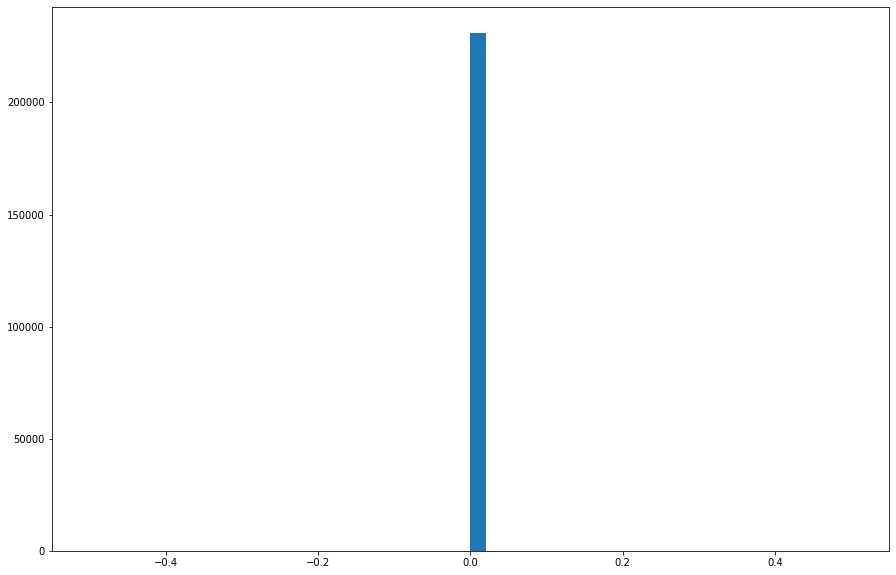

In [32]:
plot1DHistogram(allHits.sdb, bins=50)

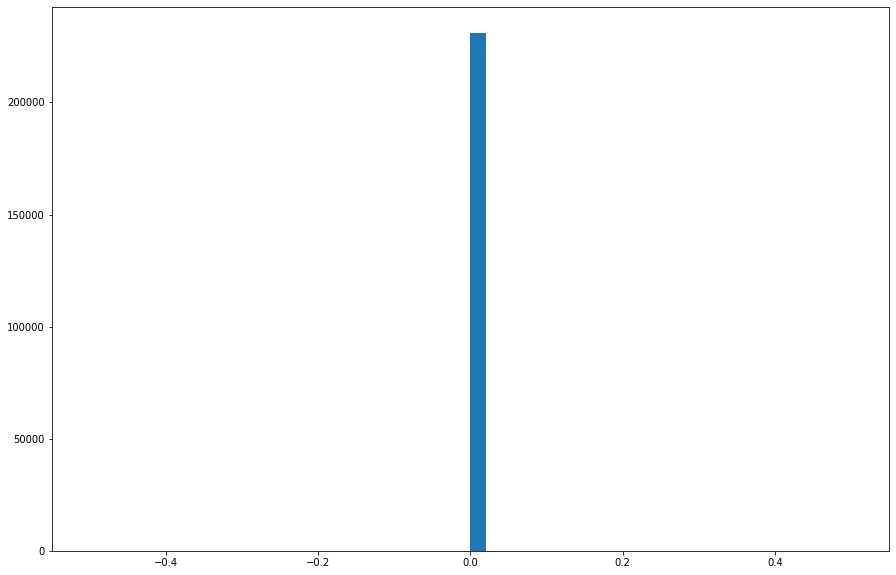

In [33]:
plot1DHistogram(allHits.sde, bins=50)

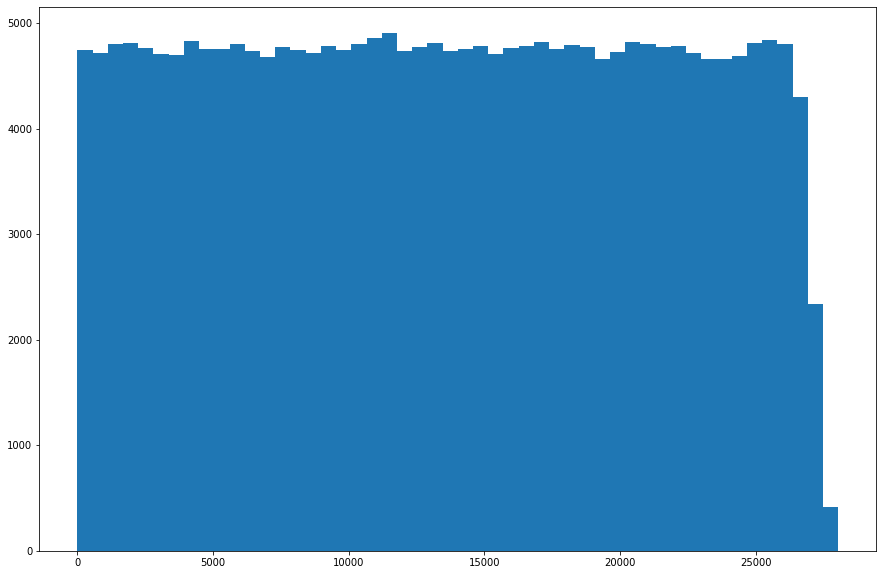

In [34]:
plot1DHistogram(allHits.tsb, bins=50)

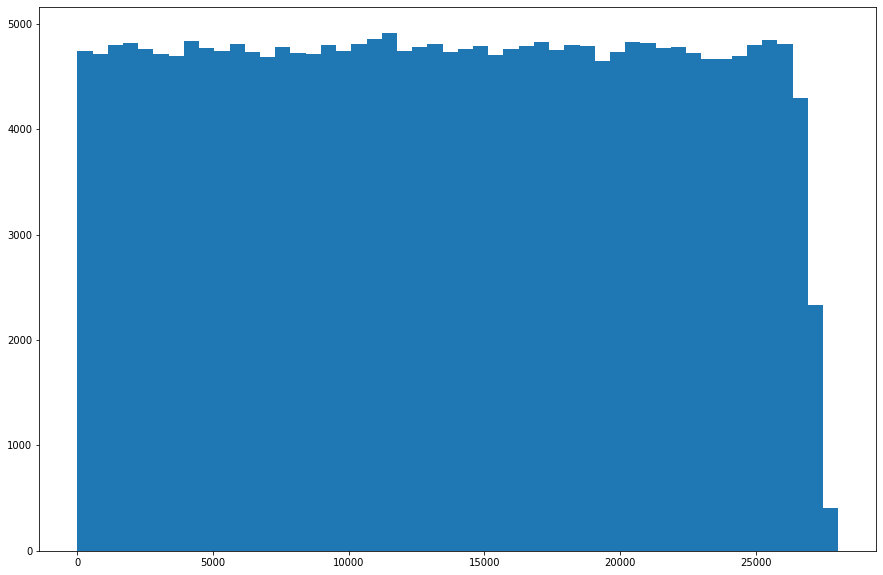

In [35]:
plot1DHistogram(allHits.tse, bins=50)

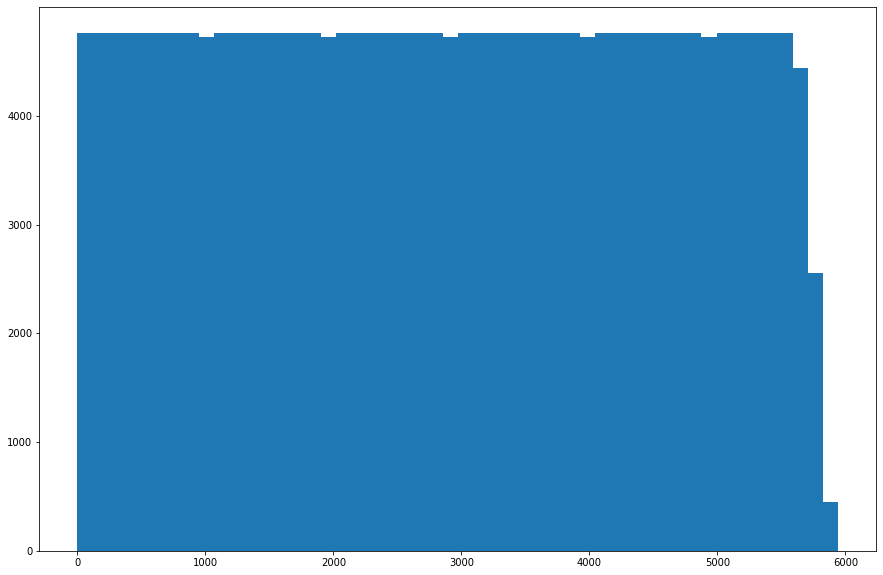

In [37]:
plot1DHistogram(allHits.dxdqB, bins=50)

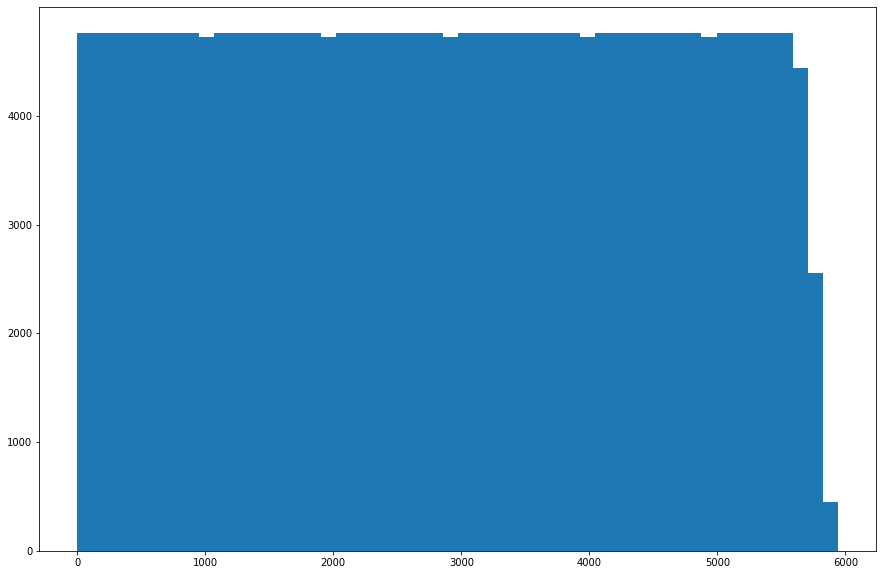

In [38]:
plot1DHistogram(allHits.dxdqE, bins=50)

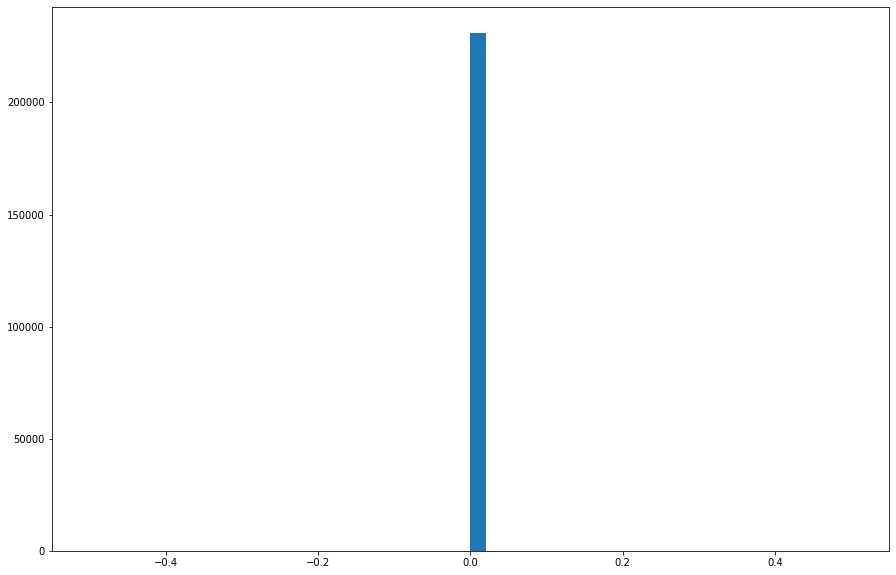

In [39]:
plot1DHistogram(allHits.thb, bins=50)

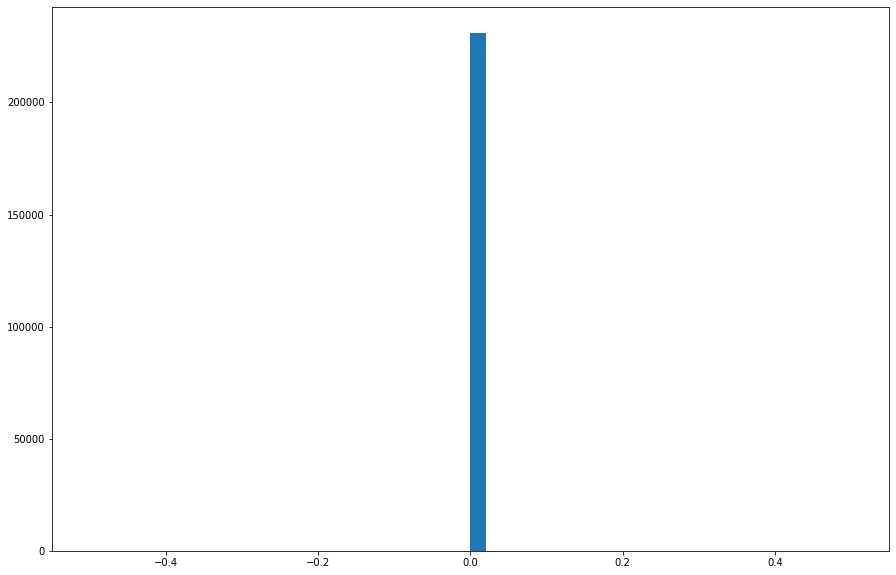

In [40]:
plot1DHistogram(allHits.the, bins=50)

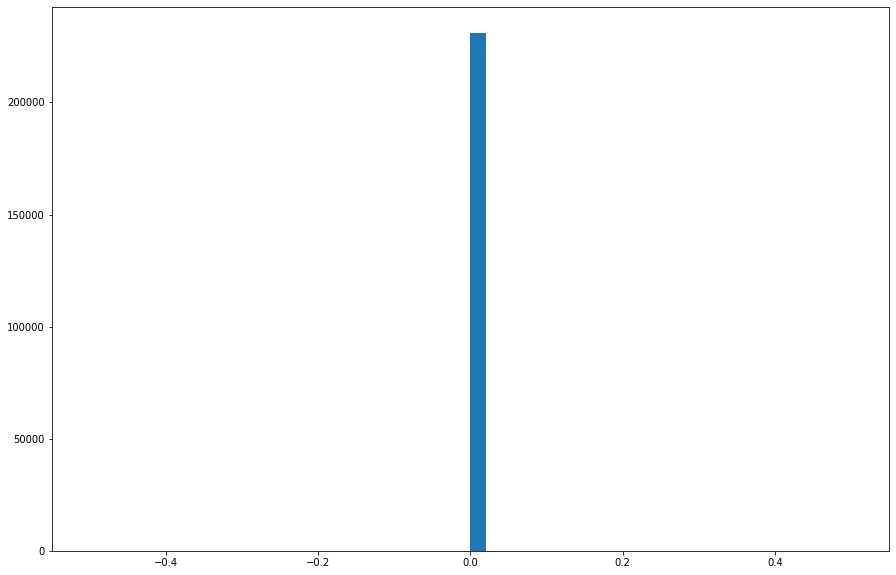

In [41]:
plot1DHistogram(allHits.tb, bins=50)

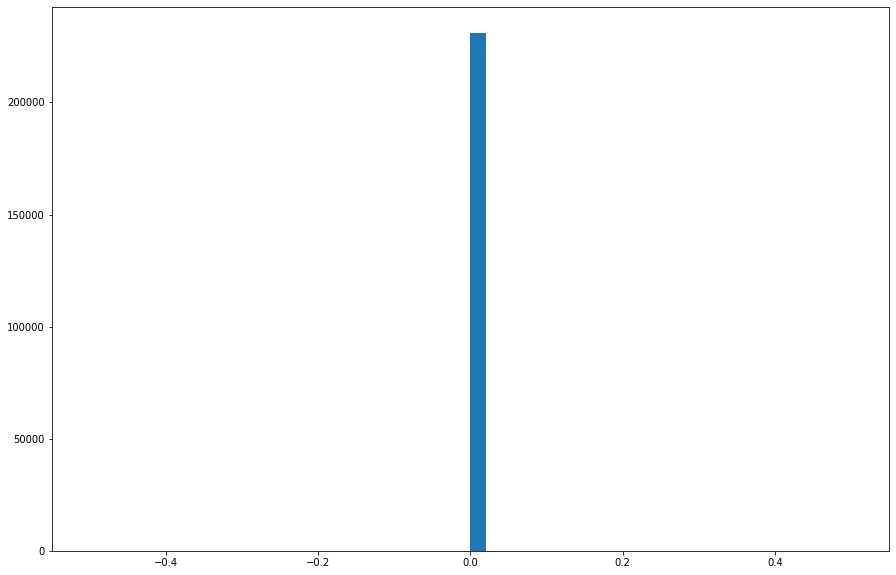

In [42]:
plot1DHistogram(allHits.te, bins=50)

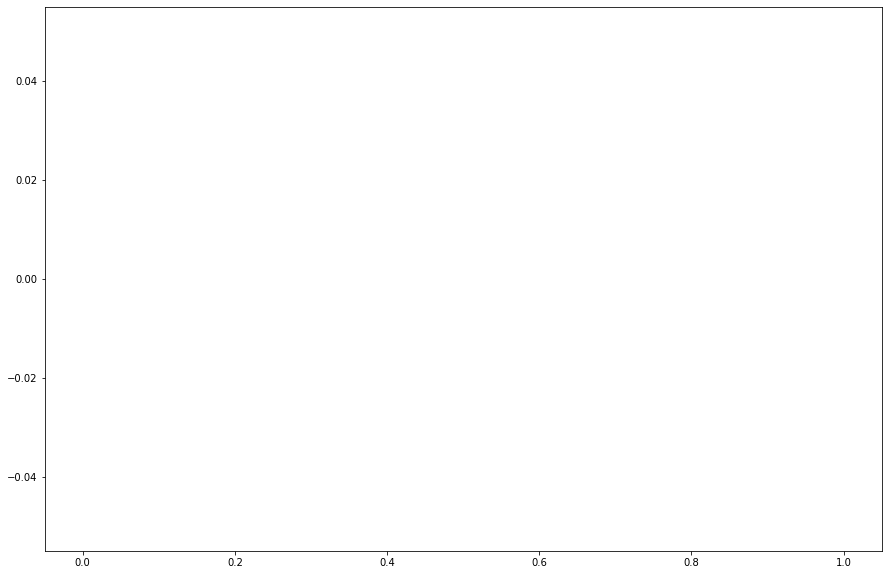

In [59]:
plot1DHistogram(allHits.CID0, bins=50)

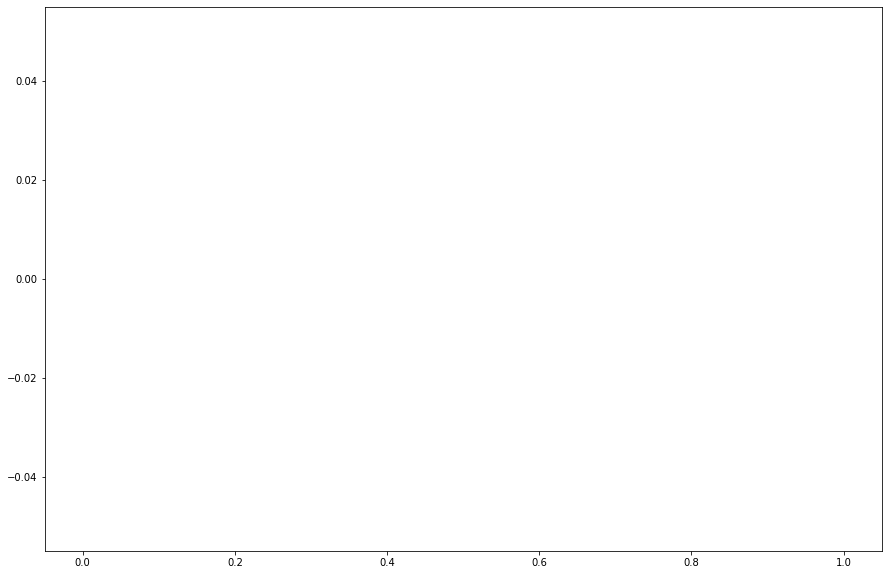

In [60]:
plot1DHistogram(allHits.CID1, bins=50)

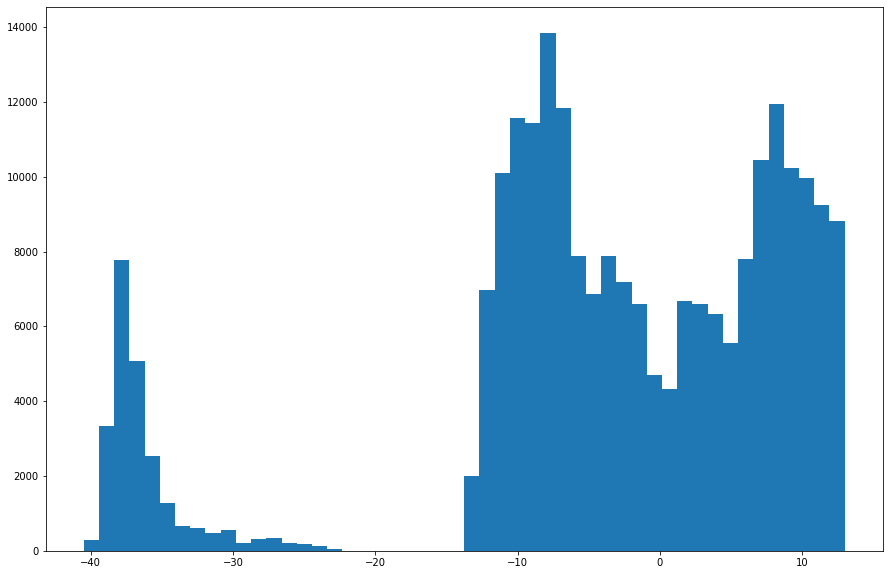

In [48]:
plot1DHistogram(allHitsB.z0, bins=50)

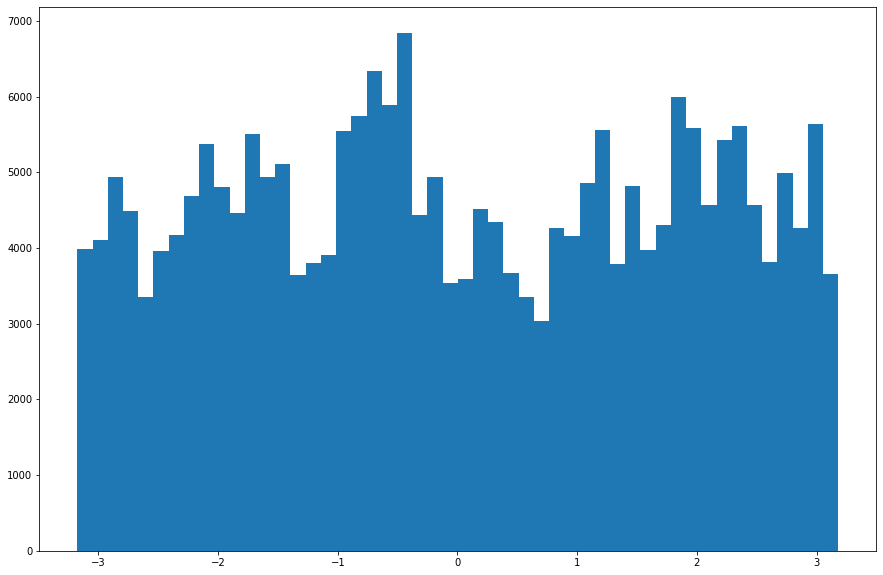

In [49]:
plot1DHistogram(allHitsB.phi, bins=50)

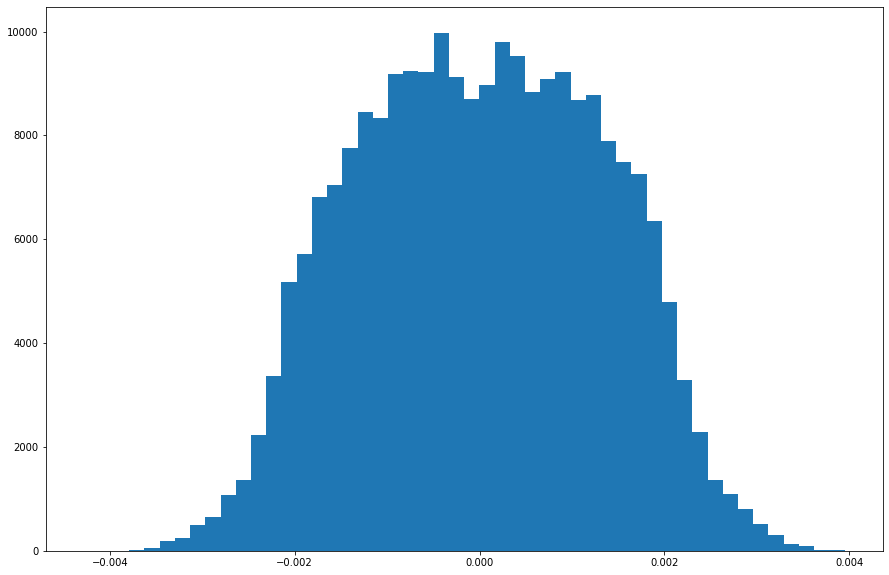

In [50]:
plot1DHistogram(allHitsB.omega, bins=50)

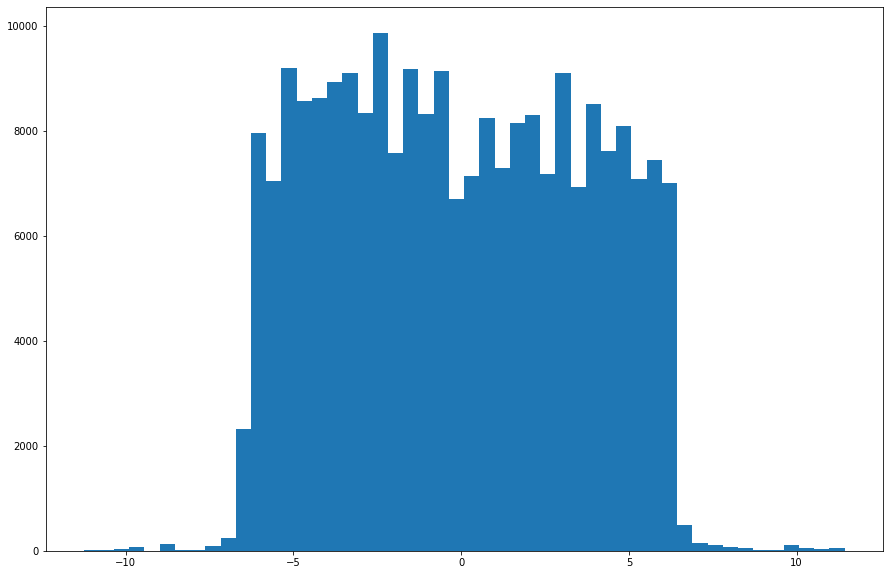

In [51]:
plot1DHistogram(allHitsB.d0, bins=50)

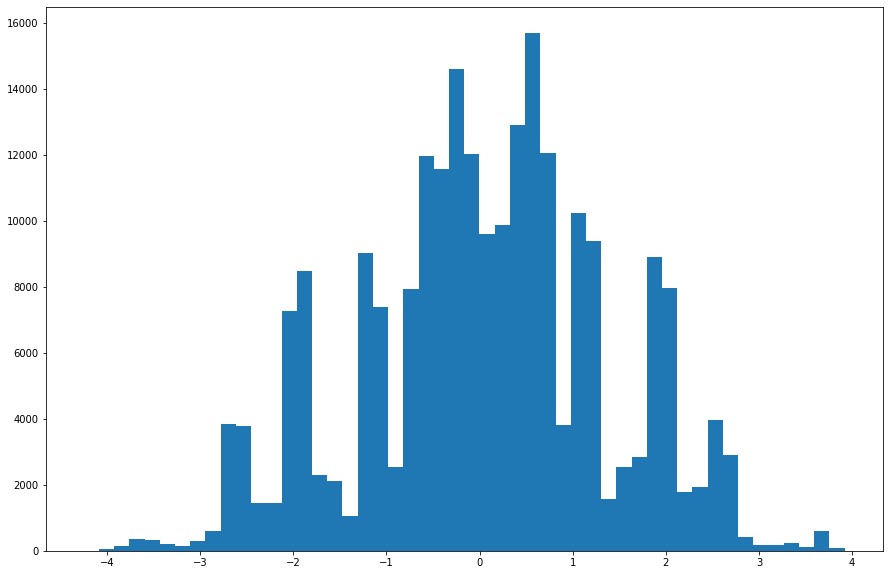

In [52]:
plot1DHistogram(allHitsB.tanLam, bins=50)

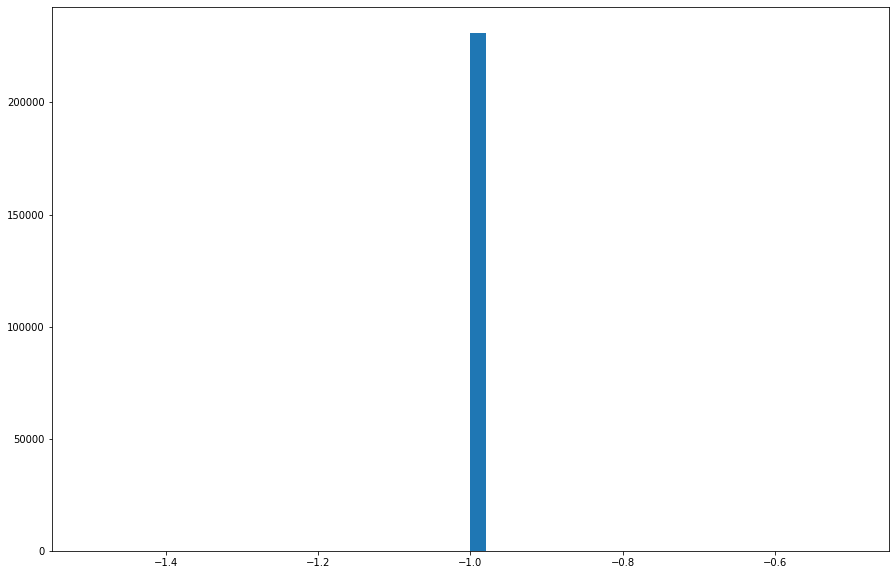

In [53]:
plot1DHistogram(allHitsB.time, bins=50)

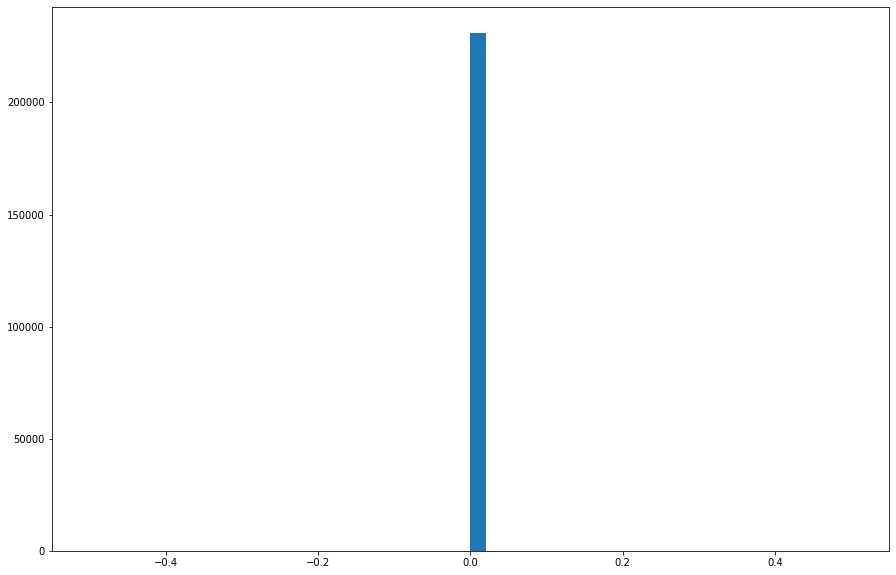

In [54]:
plot1DHistogram(allHitsB.x, bins=50)

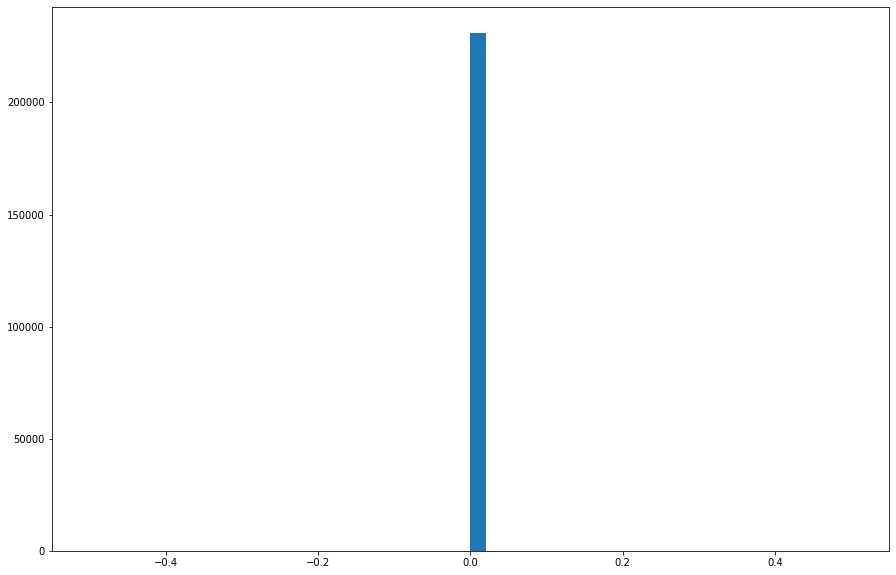

In [55]:
plot1DHistogram(allHitsB.y, bins=50)

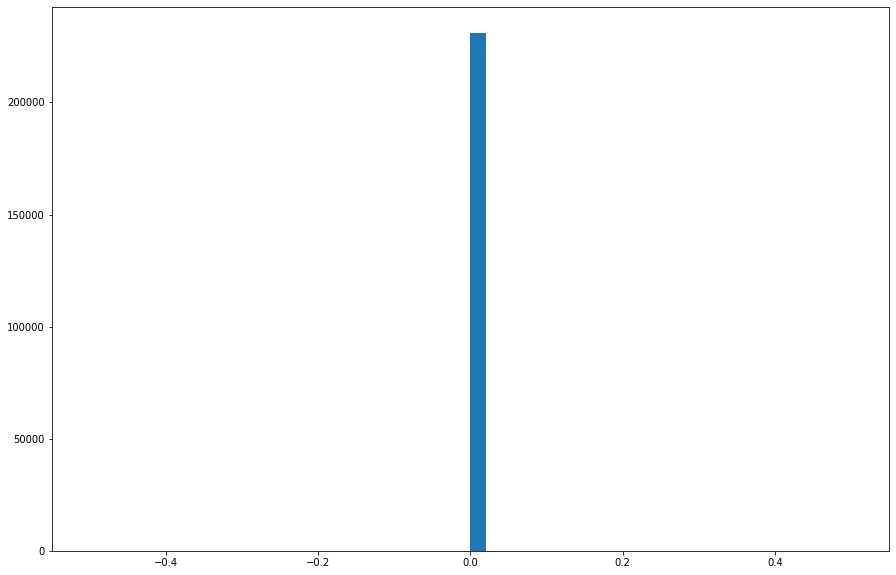

In [56]:
plot1DHistogram(allHitsB.z, bins=50)